In [1]:
library(dplyr)
library(lubridate)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
#1) read the data and import in a data.frame or tibble structure

feb = read.csv("/home/alcadis/Desktop/ASPA/Ex1/JC-201902-citibike-tripdata.csv")
mar = read.csv("/home/alcadis/Desktop/ASPA/Ex1/JC-201903-citibike-tripdata.csv")
apr = read.csv("/home/alcadis/Desktop/ASPA/Ex1/JC-201904-citibike-tripdata.csv")
may = read.csv("/home/alcadis/Desktop/ASPA/Ex1/JC-201905-citibike-tripdata.csv")
jun = read.csv("/home/alcadis/Desktop/ASPA/Ex1/JC-201906-citibike-tripdata.csv")


head(feb,5)
nrow(feb)

,tripduration,starttime,stoptime,start.station.id,start.station.name,start.station.latitude,start.station.longitude,end.station.id,end.station.name,end.station.latitude,end.station.longitude,bikeid,usertype,birth.year,gender
,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>,<int>,<int>
1,142,2019-02-01 15:35:02.0820,2019-02-01 15:37:24.1360,3183,Exchange Place,40.71625,-74.03346,3639,Harborside,40.71925,-74.03423,29677,Subscriber,1963,1
2,223,2019-02-01 17:00:46.8900,2019-02-01 17:04:30.5500,3183,Exchange Place,40.71625,-74.03346,3681,Grand St,40.71518,-74.03768,26234,Subscriber,1992,2
3,106,2019-02-01 17:08:01.3260,2019-02-01 17:09:47.4400,3183,Exchange Place,40.71625,-74.03346,3184,Paulus Hook,40.71415,-74.03355,29588,Subscriber,1960,1
4,370,2019-02-01 17:09:31.2100,2019-02-01 17:15:41.6550,3183,Exchange Place,40.71625,-74.03346,3211,Newark Ave,40.72153,-74.04630,29250,Subscriber,1976,1
5,315,2019-02-01 17:19:53.2490,2019-02-01 17:25:09.1400,3183,Exchange Place,40.71625,-74.03346,3273,Manila & 1st,40.72165,-74.04288,29586,Subscriber,1980,1


[1] 18565

In [3]:
#2) merge the five data frames in an unique structure

dataset = rbind(feb, mar, apr, may, jun)

head(dataset,5)
nrow(dataset)

,tripduration,starttime,stoptime,start.station.id,start.station.name,start.station.latitude,start.station.longitude,end.station.id,end.station.name,end.station.latitude,end.station.longitude,bikeid,usertype,birth.year,gender
,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>,<int>,<int>
1,142,2019-02-01 15:35:02.0820,2019-02-01 15:37:24.1360,3183,Exchange Place,40.71625,-74.03346,3639,Harborside,40.71925,-74.03423,29677,Subscriber,1963,1
2,223,2019-02-01 17:00:46.8900,2019-02-01 17:04:30.5500,3183,Exchange Place,40.71625,-74.03346,3681,Grand St,40.71518,-74.03768,26234,Subscriber,1992,2
3,106,2019-02-01 17:08:01.3260,2019-02-01 17:09:47.4400,3183,Exchange Place,40.71625,-74.03346,3184,Paulus Hook,40.71415,-74.03355,29588,Subscriber,1960,1
4,370,2019-02-01 17:09:31.2100,2019-02-01 17:15:41.6550,3183,Exchange Place,40.71625,-74.03346,3211,Newark Ave,40.72153,-74.04630,29250,Subscriber,1976,1
5,315,2019-02-01 17:19:53.2490,2019-02-01 17:25:09.1400,3183,Exchange Place,40.71625,-74.03346,3273,Manila & 1st,40.72165,-74.04288,29586,Subscriber,1980,1


[1] 150792

In [4]:
any(is.na(dataset))
#if there's some
dataset = na.omit(dataset)

[1] FALSE

In [5]:
#4.1) compute the average and the median trip duration in minutes

tp_avg = mean(dataset$tripduration)/60
tp_median = median(dataset$tripduration)/60
print(paste("The average of the trip duration is: ", round(tp_avg,2), "minutes"))
print(paste("The median of the trip duration is: ", round(tp_median,2), "minutes"))

[1] "The average of the trip duration is:  12.81 minutes"
[1] "The median of the trip duration is:  5.68 minutes"


In [6]:
#4.2) evaluate the minimum and maximum trip duration; does that sound like a reasonable value?

tp_min = min(dataset$tripduration)/60
tp_max = max(dataset$tripduration)/60
print(paste("The min trip duration is: ", round(tp_min,2), "minutes"))
print(paste("The max trip duration is: ", round(tp_max,2), "minutes or", round(tp_max/60,2), "hours"))
#clearly there's something not okay with the max trip duration. this should be an outliner.

[1] "The min trip duration is:  1.02 minutes"
[1] "The max trip duration is:  28817 minutes or 480.28 hours"


In [7]:
#4.3) repeat the calculation of the average (and the median) trip duration by excluding trips longer than
#3 hours. Next, evaluate the number of skimmed entries

less_dataset = dataset[dataset$tripduration < 3*3600, ,drop=FALSE] #drop=FALSE so that the result don't changes its type
tp_avg_less = mean(less_dataset$tripduration)/60
tp_median_less = median(less_dataset$tripduration)/60
print(paste("The average of trips that are under 3 hours is: ", round(tp_avg_less,2), "minutes"))
print(paste("The median of trips that are under 3 hours is: ", round(tp_median_less,2), "minutes"))

[1] "The average of trips that are under 3 hours is:  9.22 minutes"
[1] "The median of trips that are under 3 hours is:  5.67 minutes"


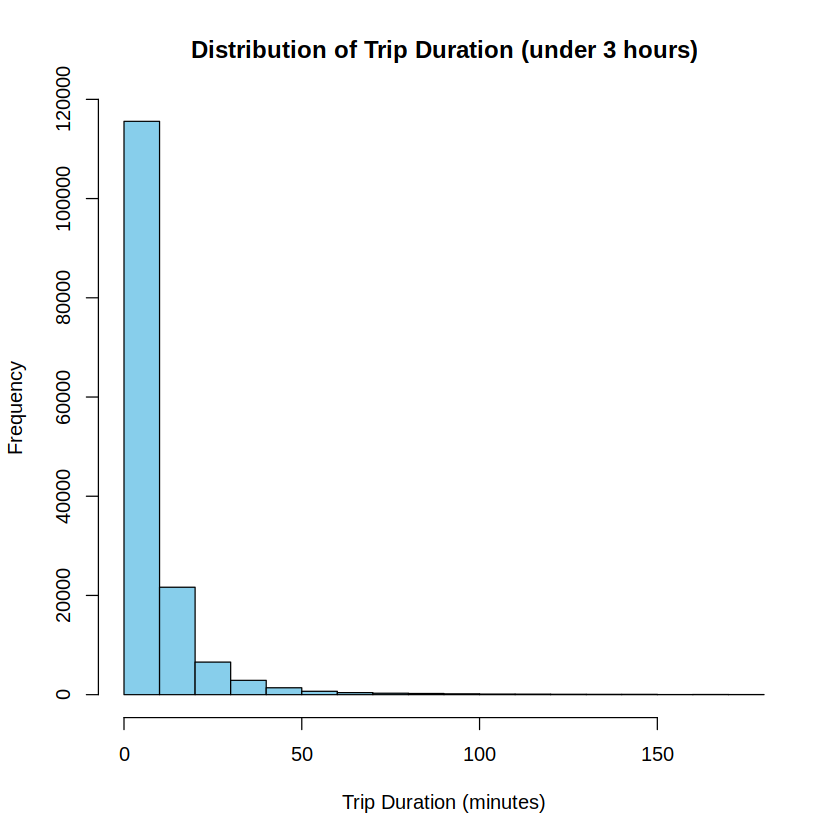

In [8]:
#4.4) plot the distribution of trip duration after the skimming of the previous point

hist(less_dataset$tripduration / 60, 
     breaks = "Sturges",
     main = "Distribution of Trip Duration (under 3 hours)", 
     xlab = "Trip Duration (minutes)", 
     col = "skyblue", 
     border = "black")

$feb
[1] 605

$mar
[1] 546

$apr
[1] 714

$may
[1] 824

$jun
[1] 974

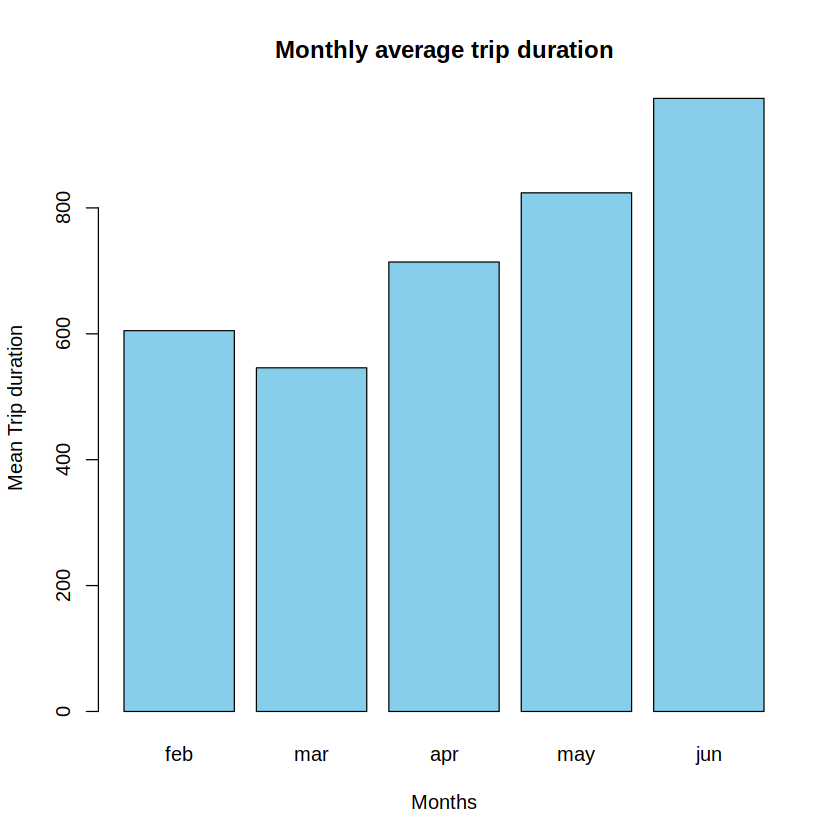

In [9]:
#5) plot the monthly average trip duration

months = list(feb = feb, mar = mar, apr = apr, may = may, jun = jun)

td_month_avg_list = list()
for (month in names(months)) {
    td_avg_month = round(mean(months[[month]]$tripduration))
    td_month_avg_list[[month]] = td_avg_month
}

td_month_avg_list
td_month_avg_vector = unlist(td_month_avg_list)

barplot(td_month_avg_vector,
        main = "Monthly average trip duration",
        xlab = "Months",
        ylab = "Mean Trip duration",
        col = "skyblue",
        border = "black")

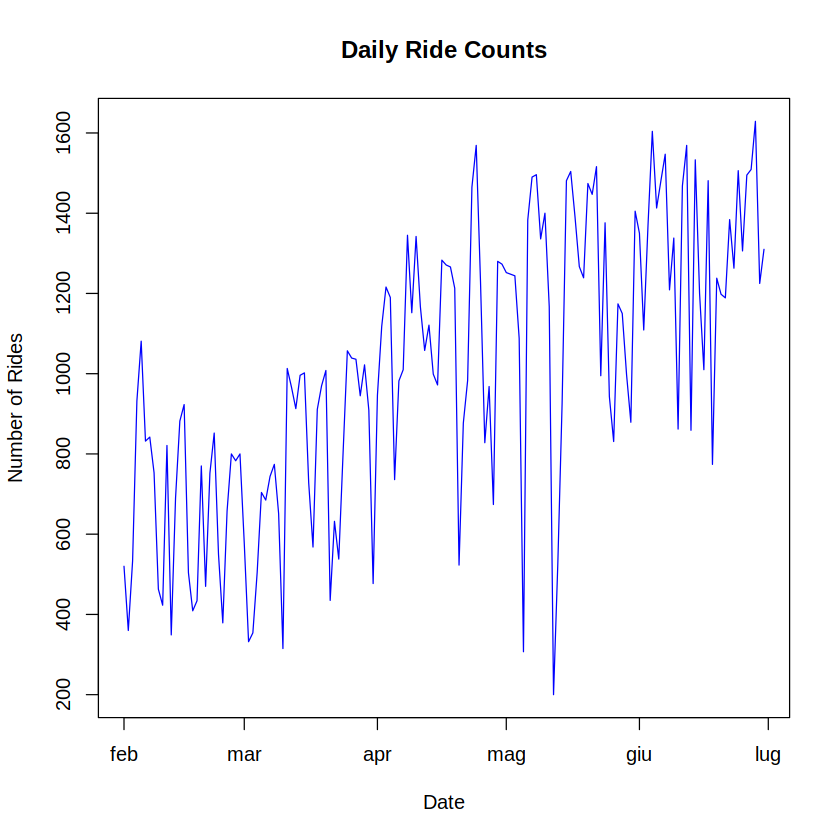

In [10]:
#6.1) plot the number of rides per day

daily_rides = dataset %>%
    mutate(date = as.Date(starttime)) %>% #new column called "date" that transform starttime in a Date format
    group_by(date) %>%
    summarise(ride_count = length(date)) #creates a new data frame by applying summary functions to each group.

plot(daily_rides$date, daily_rides$ride_count, type = "l",
     main = "Daily Ride Counts",
     xlab = "Date",
     ylab = "Number of Rides",
     col = "blue")

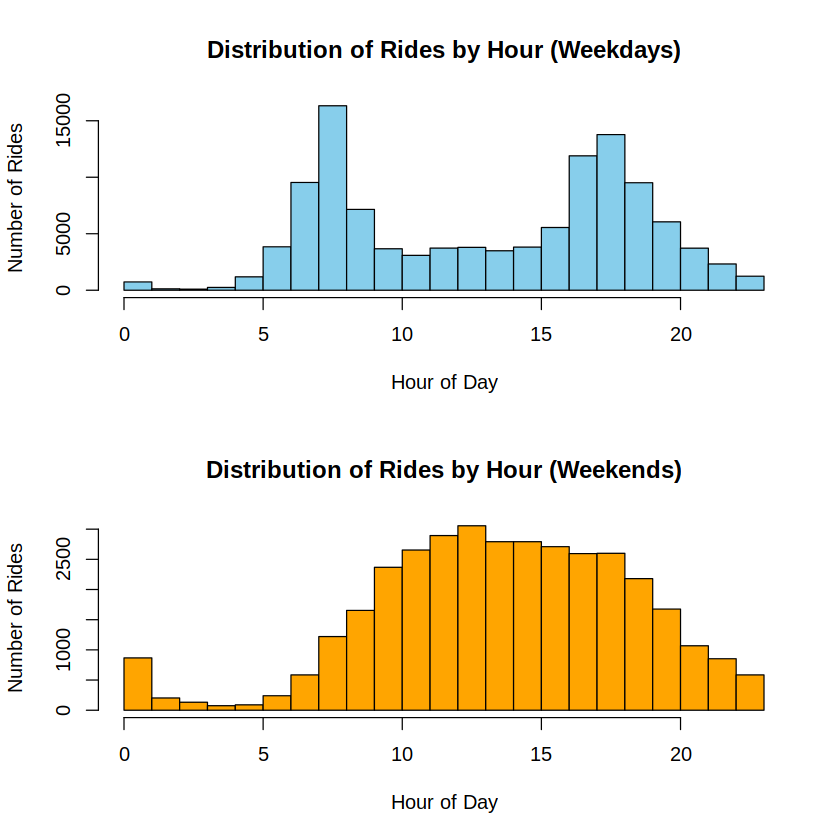

In [21]:
#6.2) plot the hourly distribution on weekdays and on weekends

dataset$hour = hour(dataset$starttime)
dataset$day_of_week = wday(dataset$starttime)
dataset$type_of_day = ifelse(dataset$day_of_week %in% c(1, 7), "Weekend", "Weekday")

weekday_data = dataset[dataset$type_of_day == "Weekday", ]
weekend_data = dataset[dataset$type_of_day == "Weekend", ]

par(mfrow = c(2, 1)) #set up a 2-row plot layout

hist(weekday_data$hour, breaks = 24, col = "skyblue", border = "black", 
     main = "Distribution of Rides by Hour (Weekdays)",
     xlab = "Hour of Day", ylab = "Number of Rides")

hist(weekend_data$hour, breaks = 24, col = "orange", border = "black", 
     main = "Distribution of Rides by Hour (Weekends)",
     xlab = "Hour of Day", ylab = "Number of Rides")

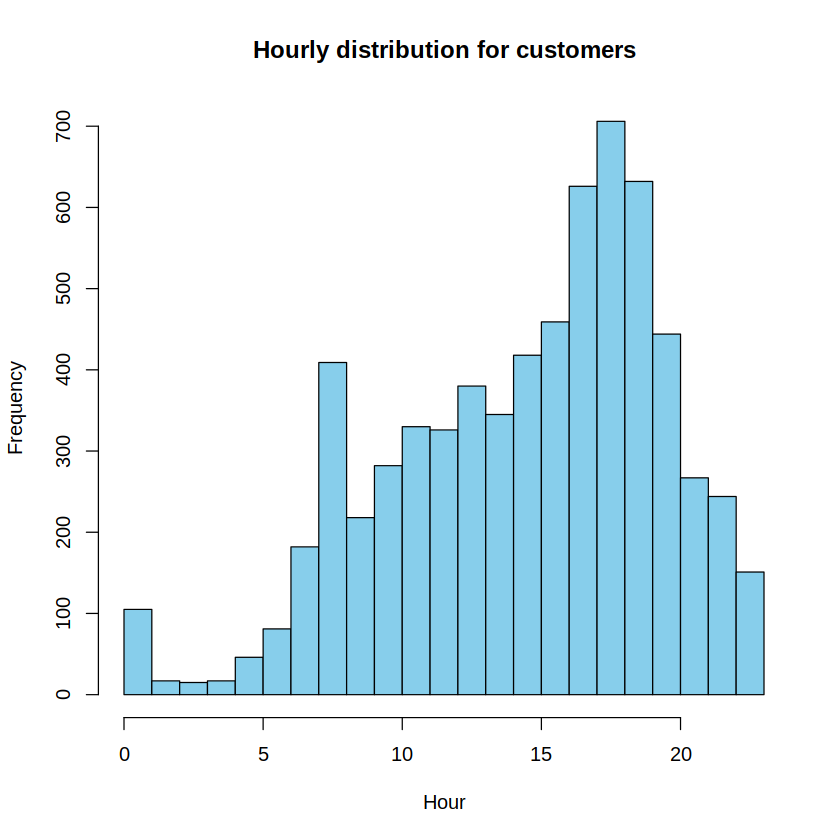

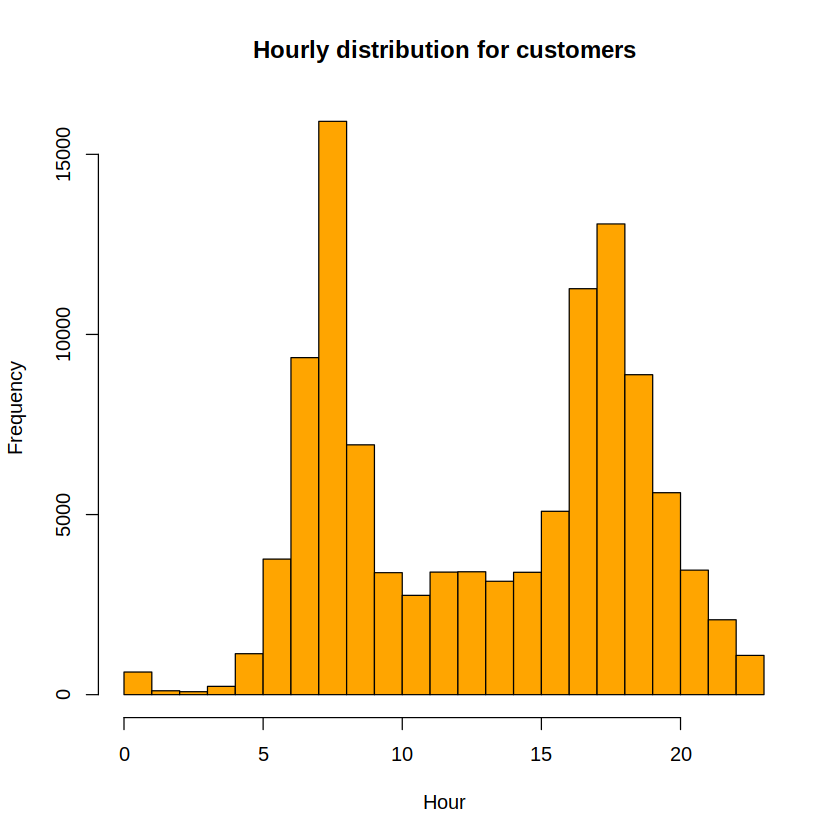

In [20]:
#6.3) plot again the average hourly distribution on weekdays but separating customer and subscriber
#users

weekday_customer = weekday_data[weekday_data$usertype == "Customer", ]
weekday_subscriber = weekday_data[weekday_data$usertype == "Subscriber", ]

hist(weekday_customer$hour,
     breaks = 24,
     main = "Hourly distribution for customers",
     xlab = "Hour",
     col = "skyblue",
     border = "black")

hist(weekday_subscriber$hour,
     breaks = 24,
     main = "Hourly distribution for customers",
     xlab = "Hour",
     col = "orange",
     border = "black")

In [22]:
#7.1) using the latitude and longitude information , evaluate the average speed (in km/h) of a user,
#discarding the trip lasting longer than 1 hour

one_hour_trips = filter(dataset, tripduration<=3600)

one_hour_trips$distance_in_km = sqrt(
    ((one_hour_trips$end.station.longitude - one_hour_trips$start.station.longitude)*111*
     cos(one_hour_trips$end.station.latitude - one_hour_trips$start.station.latitude))^2 +
                         ((one_hour_trips$end.station.latitude - one_hour_trips$start.station.latitude)*111)^2) 

one_hour_trips$km_h = one_hour_trips$distance_in_km / ((one_hour_trips$tripduration)/3600)
average_km_h = mean(one_hour_trips$km_h)
cat("The average km/h for trips under 1 hour is: ", round(average_km_h,2))

The average km/h for trips under 1 hour is:  10.59

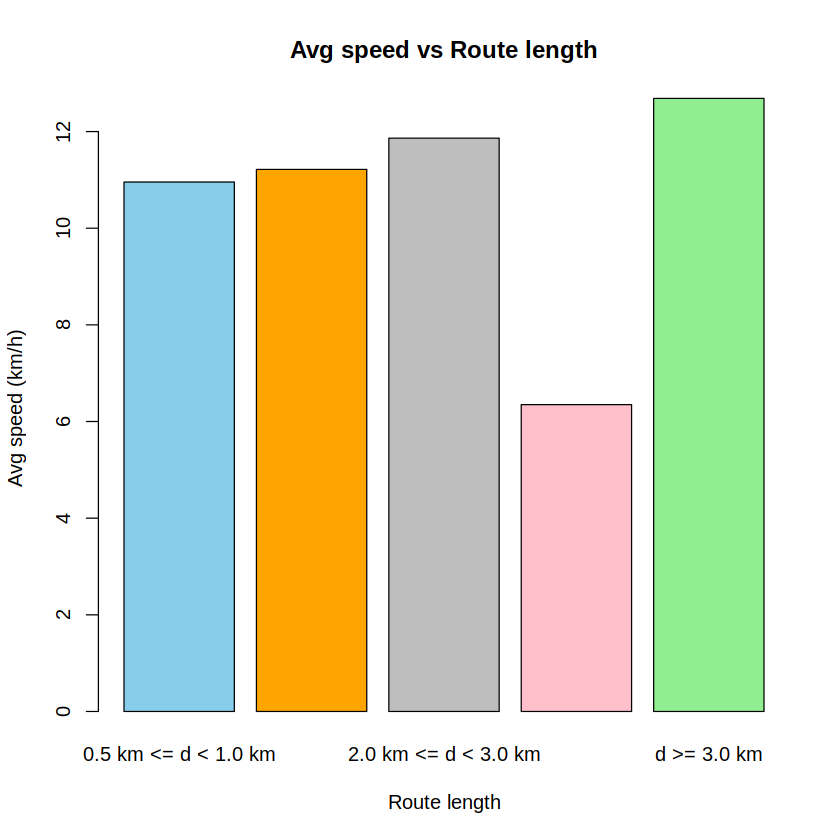

In [31]:
#7.2) plot the average speed as a function of route length for the following group of distances d < 500 m,
#500 m < d < 1000 m, 1000 m < d < 2000 m, 2000 m < d < 3000 m, d > 3000 m and discarding
#trips longer than 1 hour

one_hour_trips$trip_distance = ifelse(
  one_hour_trips$distance_in_km < 0.5, "d < 0.5 km", 
  ifelse(one_hour_trips$distance_in_km >= 0.5 & one_hour_trips$distance_in_km < 1, "0.5 km <= d < 1.0 km", 
  ifelse(one_hour_trips$distance_in_km >= 1 & one_hour_trips$distance_in_km < 2, "1.0 km <= d < 2.0 km", 
  ifelse(one_hour_trips$distance_in_km >= 2 & one_hour_trips$distance_in_km < 3, "2.0 km <= d < 3.0 km", "d >= 3.0 km"
))))

avg_trips = one_hour_trips %>%
    group_by(trip_distance) %>%
    summarize(avg_speed = mean(km_h, na.rm = TRUE))

barplot(avg_trips$avg_speed,
        names.arg = avg_trips$trip_distance,
        main = "Avg speed vs Route length",
        xlab = "Route length",
        ylab = "Avg speed (km/h)",
        col = c("skyblue", "orange", "grey", "pink", "lightgreen"),
        border = "black")

In [36]:
head(one_hour_trips, 5)

,tripduration,starttime,stoptime,start.station.id,start.station.name,start.station.latitude,start.station.longitude,end.station.id,end.station.name,end.station.latitude,⋯,bikeid,usertype,birth.year,gender,hour,day_of_week,type_of_day,distance_in_km,km_h,trip_distance
,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,⋯,<int>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
1,142,2019-02-01 15:35:02.0820,2019-02-01 15:37:24.1360,3183,Exchange Place,40.71625,-74.03346,3639,Harborside,40.71925,⋯,29677,Subscriber,1963,1,15,6,Weekday,0.3444535,8.732623,d < 0.5 km
2,223,2019-02-01 17:00:46.8900,2019-02-01 17:04:30.5500,3183,Exchange Place,40.71625,-74.03346,3681,Grand St,40.71518,⋯,26234,Subscriber,1992,2,17,6,Weekday,0.4837064,7.808714,d < 0.5 km
3,106,2019-02-01 17:08:01.3260,2019-02-01 17:09:47.4400,3183,Exchange Place,40.71625,-74.03346,3184,Paulus Hook,40.71415,⋯,29588,Subscriber,1960,1,17,6,Weekday,0.2334953,7.930029,d < 0.5 km
4,370,2019-02-01 17:09:31.2100,2019-02-01 17:15:41.6550,3183,Exchange Place,40.71625,-74.03346,3211,Newark Ave,40.72153,⋯,29250,Subscriber,1976,1,17,6,Weekday,1.5415356,14.998725,1.0 km <= d < 2.0 km
5,315,2019-02-01 17:19:53.2490,2019-02-01 17:25:09.1400,3183,Exchange Place,40.71625,-74.03346,3273,Manila & 1st,40.72165,⋯,29586,Subscriber,1980,1,17,6,Weekday,1.2059486,13.782270,1.0 km <= d < 2.0 km


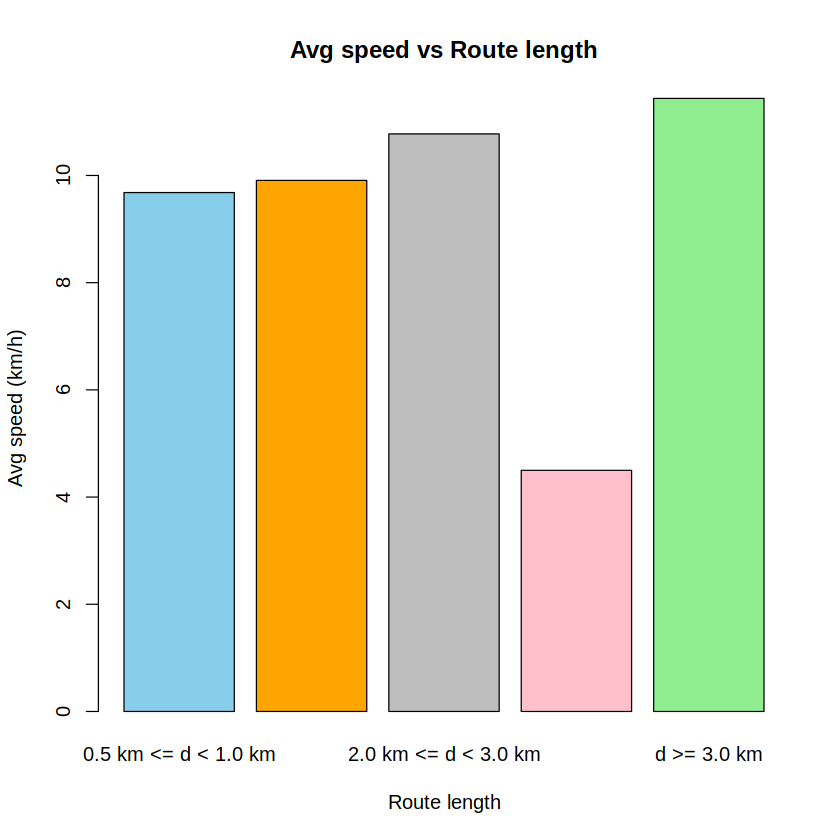

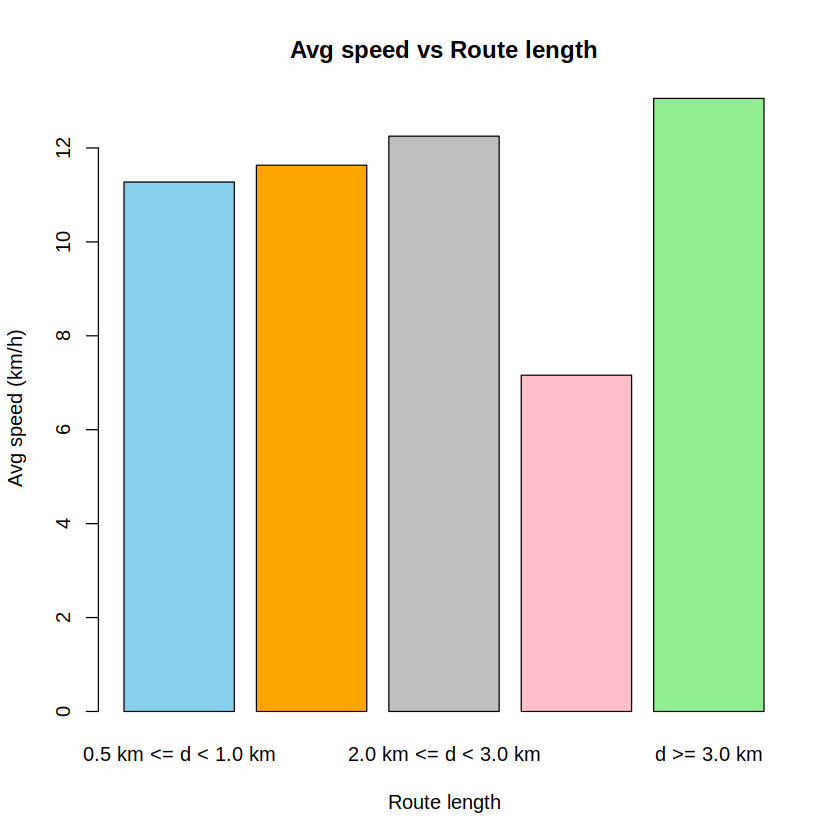

In [39]:
#7.3) repeat the same graph, but show the results obtained separately for weekdays and weekends

one_hour_trips_weekend = one_hour_trips[one_hour_trips$type_of_day == "Weekend", ]
one_hour_trips_weekday = one_hour_trips[one_hour_trips$type_of_day == "Weekday", ]

avg_trips_we = one_hour_trips_weekend %>%
    group_by(trip_distance) %>%
    summarize(avg_speed = mean(km_h, na.rm = TRUE))

avg_trips_wd = one_hour_trips_weekday %>%
    group_by(trip_distance) %>%
    summarize(avg_speed = mean(km_h, na.rm = TRUE))

barplot(avg_trips_we$avg_speed,
        names.arg = avg_trips_we$trip_distance,
        main = "Avg speed vs Route length",
        xlab = "Route length",
        ylab = "Avg speed (km/h)",
        col = c("skyblue", "orange", "grey", "pink", "lightgreen"),
        border = "black")

barplot(avg_trips_wd$avg_speed,
        names.arg = avg_trips_wd$trip_distance,
        main = "Avg speed vs Route length",
        xlab = "Route length",
        ylab = "Avg speed (km/h)",
        col = c("skyblue", "orange", "grey", "pink", "lightgreen"),
        border = "black")

In [49]:
#8.1) find the most common start station and the least popular end station

most_popular_start_station = dataset %>%
    group_by(start.station.name) %>%
    summarise(total = length(start.station.name)) %>%
    arrange(desc(total)) %>%
    slice(1)

least_popular_end_station = dataset %>%
    group_by(end.station.name) %>%
    summarise(total = length(end.station.name)) %>%
    arrange(total) %>%
    slice(1)

print(most_popular_start_station)
print(least_popular_end_station)

# A tibble: 1 × 2
  start.station.name total
  <chr>              <int>
1 Grove St PATH      17902
# A tibble: 1 × 2
  end.station.name total
  <chr>            <int>
1 1 Ave & E 16 St      1


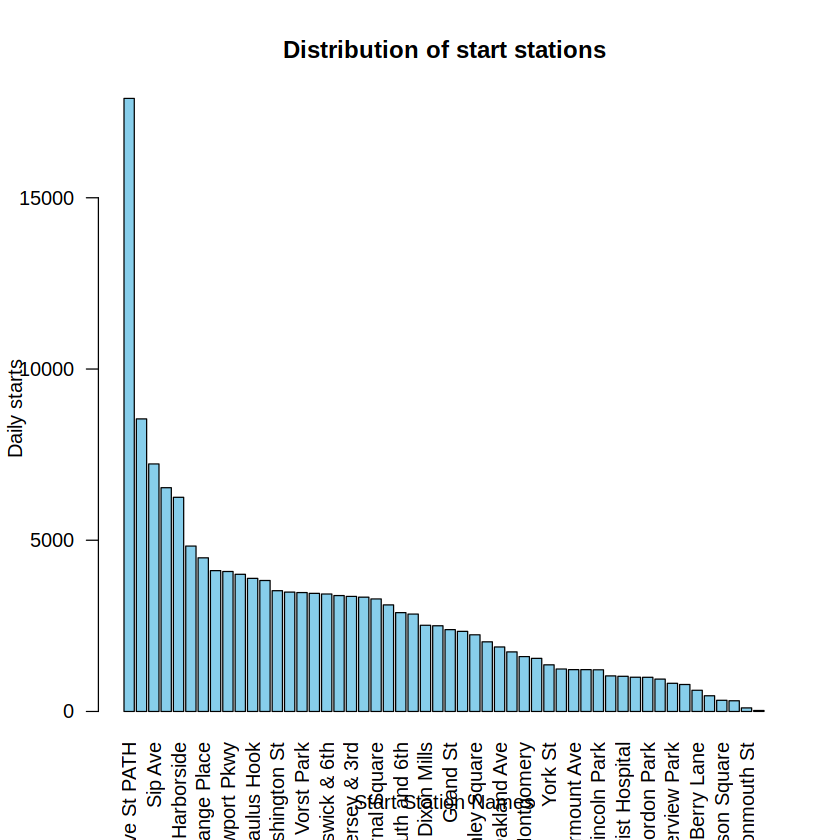

In [60]:
#8.2) show the distribution of start stations

most_popular_start_station = dataset %>%
    group_by(start.station.name) %>%
    summarise(total = length(start.station.name)) %>%
    arrange(desc(total))

barplot(most_popular_start_station$total,
        names.arg = most_popular_start_station$start.station.name,
        main = "Distribution of start stations",
        xlab = "Start Station Names",
        las = 2,
        ylab = "Daily starts",
        col = "skyblue",
        border = "black")

In [63]:
#8.3) find the three most common routes (start and end station) and the three least popular ones

route_freq = dataset %>%
  group_by(start.station.name, end.station.name) %>%
  summarize(count=length(start.station.name), .groups = "drop")

top_routes = route_freq %>%
  arrange(desc(count)) %>%
  slice(1:3)

bot_routes = route_freq %>%
  arrange(count) %>%
  slice(1:3)

print(top_routes)
print(bot_routes)

# A tibble: 3 × 3
  start.station.name end.station.name count
  <chr>              <chr>            <int>
1 Hamilton Park      Grove St PATH     3037
2 Grove St PATH      Hamilton Park     2318
3 Brunswick & 6th    Grove St PATH     1916
# A tibble: 3 × 3
  start.station.name end.station.name count
  <chr>              <chr>            <int>
1 5 Corners Library  Dixon Mills          1
2 5 Corners Library  Grand St             1
3 Astor Place        Brunswick & 6th      1
